In [ ]:
"""
                         Politécnico de Leiria
       Licenciatura Engenharia Eletrotécnica e de Computadores
                        Projeto Final de Curso
                                Dem4AI


Autores:  Francisco António Lisboa Guarda   Nº2201675
          Samuel Domingos Lourenço          Nº2200904


Orientadores: Luís Manuel Conde Bento
              Mónica Jorge Carvalho de Figueiredo


"""



import math
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
"""
Valores do PowerPoint

w1 = 0.11
w2 = 0.25
w3 = 0.27
w4 = 0.32
w5 = 0.37
w6 = 0.43
w7 = 0.48
w8 = 0.53

b11 = 0.30
b12 = 0.36
b21 = 0.26
b22 = 0.41

i1 = 0.22
i2 = 0.93
"""



"""
Valores https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
"""
w1 = 0.15
w2 = 0.20
w3 = 0.25
w4 = 0.30
w5 = 0.40
w6 = 0.45
w7 = 0.50
w8 = 0.55

b11 = 0.35
b12 = 0.35
b21 = 0.60
b22 = 0.60

i1 = 0.05
i2 = 0.1

LLCD = 9 # LIMITAR_LIMITAR_CASAS_DECIMAS


targeto1 = 0.01
targeto2 = 1 - targeto1

learning_rate = 0.5 # taxa de aprendizagem
stop_learning_limit = 0.9

erros_total = []

def ajustar_pesos_bias(i1, i2, w1, w2, w3, w4, w5, w6, w7, w8, b11, b12, b21, b22, learning_rate, stop_learning_limit):
    Etotal = 1
    while Etotal > stop_learning_limit:

        print("------------------------Camada de Oculta--------------------")
        entrada_h1 = w1 * i1 + w2 * i2 + b11 * 1
        entrada_h2 = w3 * i1 + w4 * i2 + b12 * 1

        entrada_h1_LLCD = round(entrada_h1, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        entrada_h2_LLCD = round(entrada_h2, LLCD) # limirar a LIMITAR_CASAS_DECIMAS

        print("Entrada(h1)=", entrada_h1_LLCD)
        print("Entrada(h2)=", entrada_h2_LLCD)

        saida_h1 = 1 / (1 + math.exp(-entrada_h1_LLCD))
        saida_h2 = 1 / (1 + math.exp(-entrada_h2_LLCD))

        saida_h1_LLCD = round(saida_h1, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        saida_h2_LLCD = round(saida_h2, LLCD) # limirar a LIMITAR_CASAS_DECIMAS

        print("Saida(h1)=", saida_h1_LLCD)
        print("Saida(h2)=", saida_h2_LLCD)

        print("------------------------Camada de Saída---------------------")
        entrada_o1 = w5 * saida_h1_LLCD + w6 * saida_h2_LLCD + b21 * 1
        entrada_o2 = w7 * saida_h1_LLCD + w8 * saida_h2_LLCD + b22 * 1

        entrada_o1_LLCD = round(entrada_o1, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        entrada_o2_LLCD = round(entrada_o2, LLCD) # limirar a LIMITAR_CASAS_DECIMAS

        print("Entrada(o1)=", entrada_o1_LLCD)
        print("Entrada(o2)=", entrada_o2_LLCD)

        saida_o1 = 1 / (1 + math.exp(-entrada_o1_LLCD))
        saida_o2 = 1 / (1 + math.exp(-entrada_o2_LLCD))

        saida_o1_LLCD = round(saida_o1, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        saida_o2_LLCD = round(saida_o2, LLCD) # limirar a LIMITAR_CASAS_DECIMAS

        print("Saida(o1)=", saida_o1_LLCD)
        print("Saida(o2)=", saida_o2_LLCD)

        print("------------------------Erro Quadratico---------------------")

        Eo1 = (1/2) * ((targeto1 - saida_o1_LLCD) ** 2)
        Eo2 = (1/2) * ((targeto2 - saida_o2_LLCD) ** 2)
        Etotal= Eo1 +Eo2  #Etotal = (1/2) * ((targeto1 - saida_o1_LLCD) ** 2) + (1/2) * ((targeto2 - saida_o2_LLCD) ** 2)


        Eo1_LLCD = round(Eo1, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        Eo2_LLCD = round(Eo2, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        Etotal_LLCD = round(Etotal, LLCD) # limirar a LIMITAR_CASAS_DECIMAS

        print("Eo1=", Eo1_LLCD)
        print("Eo2=", Eo2_LLCD)
        print("Etotal=", Etotal_LLCD)
        print("------------------------RETROPROPAGAÇÃO---------------------")


        Etotal_saida_o1= -(targeto1 - saida_o1_LLCD)
        Etotal_saida_o2= -(targeto2 - saida_o2_LLCD)

        saida_o1_entrada_o1 = saida_o1_LLCD * (1 - saida_o1_LLCD)
        saida_o2_entrada_o2 = saida_o2_LLCD * (1 - saida_o2_LLCD)

        entrada_o1_w5= saida_h1_LLCD
        entrada_o2_w7= saida_h2_LLCD




        Etotal_saida_o1_LLCD = round(Etotal_saida_o1, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        Etotal_saida_o2_LLCD = round(Etotal_saida_o2, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        saida_o1_entrada_o1_LLCD = round(saida_o1_entrada_o1, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        saida_o2_entrada_o2_LLCD = round(saida_o2_entrada_o2, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        entrada_o1_w5_LLCD = round(entrada_o1_w5, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        entrada_o2_w7_LLCD = round(entrada_o2_w7, LLCD) # limirar a LIMITAR_CASAS_DECIMAS




        print("Etotal/Saida(o1)=", Etotal_saida_o1_LLCD)
        print("EtotalSaida(o2)=", Etotal_saida_o2_LLCD)
        print("Saida(o1)/Entrada(o1)=", saida_o1_entrada_o1_LLCD)
        print("Saida(o2)/Entrada(o2)=", saida_o2_entrada_o2_LLCD)
        print("Entrada(o1)/w5=", entrada_o1_w5_LLCD )
        print("Entrada(o2)/w7=", entrada_o2_w7_LLCD )


        Etotal_w5 = Etotal_saida_o1_LLCD * saida_o1_entrada_o1_LLCD * entrada_o1_w5_LLCD #(-(targeto1 - saida_o1)) * (saida_o1 * (1 - saida_o1)) * (saida_h1)
        Etotal_w7 = Etotal_saida_o2_LLCD * saida_o2_entrada_o2_LLCD * entrada_o2_w7_LLCD #(-(targeto2 - saida_o2)) * (saida_o2 * (1 - saida_o2)) * (saida_h2)

        Eo1_Entrada_h1 = Etotal_saida_o1_LLCD * saida_o1_entrada_o1_LLCD
        Eo2_Entrada_h2 = Etotal_saida_o2_LLCD * saida_o2_entrada_o2_LLCD
        Eo1_Entrada_h1_LLCD = round(Eo1_Entrada_h1, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        Eo2_Entrada_h2_LLCD = round(Eo2_Entrada_h2, LLCD) # limirar a LIMITAR_CASAS_DECIMAS

        Eo1_Saida_h1 =Eo1_Entrada_h1_LLCD * w5
        Eo2_Saida_h1 = Eo2_Entrada_h2_LLCD * w7

        print("Eo1/Entrada(h1) =", Eo1_Entrada_h1_LLCD)
        print("Eo2/Entrada(h2) =", Eo2_Entrada_h2_LLCD)


        Etotal_w5_LLCD = round(Etotal_w5, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        Etotal_w7_LLCD = round(Etotal_w7, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        Eo1_Saida_h1_LLCD = round(Eo1_Saida_h1, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        Eo2_Saida_h1_LLCD = round(Eo2_Saida_h1, LLCD) # limirar a LIMITAR_CASAS_DECIMAS

        Etotal_Saida_h1 = Eo1_Saida_h1_LLCD + Eo2_Saida_h1_LLCD

        Etotal_Saida_h1_LLCD = round(Etotal_Saida_h1, LLCD) # limirar a LIMITAR_CASAS_DECIMAS

        saida_h1_entrada_h1= (saida_h1_LLCD * (1 - saida_h1_LLCD))
        saida_h2_entrada_h2= (saida_h2_LLCD * (1 - saida_h2_LLCD))

        saida_h1_entrada_h1_LLCD = round(saida_h1_entrada_h1, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        saida_h2_entrada_h2_LLCD = round(saida_h2_entrada_h2, LLCD) # limirar a LIMITAR_CASAS_DECIMAS

        Etotal_w1 = Etotal_Saida_h1_LLCD  * saida_h1_entrada_h1_LLCD  * i1
        Etotal_w2 = Etotal_Saida_h1_LLCD  * saida_h2_entrada_h2_LLCD  * i2

        Etotal_w1_LLCD = round(Etotal_w1, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        Etotal_w2_LLCD = round(Etotal_w2, LLCD) # limirar a LIMITAR_CASAS_DECIMAS


        print("Eo1/Saida(h1)=", Eo1_Saida_h1_LLCD)
        print("Eo2/Saida(h1)=", Eo2_Saida_h1_LLCD)
        print("Etotal/Saida(h1)=", Etotal_Saida_h1_LLCD)
        print("Saida(h1)/Entrada(h1)=", saida_h1_entrada_h1_LLCD )
        print("Saida(h2)/Entrada(h2)=", saida_h2_entrada_h2_LLCD )

        erros_total.append(Etotal_LLCD) #adiciona o Etotal para um lista de erro_total que pode ser usado para uma analise

        print("------------------------Regra da cadeia---------------------")
        print("Etotal/w5=", Etotal_w5_LLCD) #b1+c1
        print("Etotal/w7=", Etotal_w7_LLCD) #b2+c2
        print("Etotal/w1=", Etotal_w1_LLCD) #a1
        print("Etotal/w2=", Etotal_w2_LLCD) #a2


        # Atualizar pesos da camada de saída
        w5 = w5 - learning_rate * Etotal_w5_LLCD # w5 = w5-learning_rate * Etotal_w5
        w6 = w6 - learning_rate * Etotal_w5_LLCD
        w7 = w7 - learning_rate * Etotal_w7_LLCD
        w8 = w8 - learning_rate * Etotal_w7_LLCD

        w5_LLCD = round(w5, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        w6_LLCD = round(w6, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        w7_LLCD = round(w7, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        w8_LLCD = round(w8, LLCD) # limirar a LIMITAR_CASAS_DECIMAS

        print("------------------------Novos valores---------------------")
        print("---Novos pesos---")
        print("W5+ =", w5_LLCD)
        print("W6+ =", w6_LLCD)
        print("W7+ =", w7_LLCD)
        print("W8+ =", w8_LLCD)

        # Atualizar pesos da camada oculta
        w1 = w1 -learning_rate * Etotal_w1_LLCD
        w2 = w2 -learning_rate * Etotal_w2_LLCD
        w3 = w3 -learning_rate * Etotal_w1_LLCD
        w4 = w4 -learning_rate * Etotal_w2_LLCD

        w1_LLCD = round(w1, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        w2_LLCD = round(w2, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        w3_LLCD = round(w3, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        w4_LLCD = round(w4, LLCD) # limirar a LIMITAR_CASAS_DECIMAS

        print("W1+ =", w1_LLCD)
        print("W2+ =", w2_LLCD)
        print("W3+ =", w3_LLCD)
        print("W4+ =", w4_LLCD)

        # Atualizar pesos da camada de saída
        b11 = b11 -learning_rate * Etotal_w1_LLCD * 1
        b12 = b12 -learning_rate * Etotal_w2_LLCD * 1
        b21 = b21 -learning_rate * Etotal_w5_LLCD * 1
        b22 = b22 -learning_rate * Etotal_w7_LLCD * 1

        b11_LLCD = round(b11, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        b12_LLCD = round(b12, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        b21_LLCD = round(b21, LLCD) # limirar a LIMITAR_CASAS_DECIMAS
        b22_LLCD = round(b22, LLCD) # limirar a LIMITAR_CASAS_DECIMAS

        print("---Novos bias---")
        print("b1,1 =", b11_LLCD)
        print("b1,2 =", b12_LLCD)
        print("b2,1 =", b21_LLCD)
        print("b2,2 =", b22_LLCD)

        if Etotal < 0.01:
            plt.plot(range(len(erros_total)), erros_total)
            plt.xlabel('Número de iterações')
            plt.ylabel('Erro Total')
            plt.title('Ajuste de Pesos')
            plt.show()

# Controlo deslizantes para as intradas
i1_slider = widgets.FloatSlider(value=i1, min=0, max=1, step=0.01, description='i1')
i2_slider = widgets.FloatSlider(value=i2, min=0, max=1, step=0.01, description='i2')


# Controlo deslizantes para os pesos
w1_slider = widgets.FloatSlider(value=w1, min=0, max=1, step=0.01, description='w1')
w2_slider = widgets.FloatSlider(value=w2, min=0, max=1, step=0.01, description='w2')
w3_slider = widgets.FloatSlider(value=w3, min=0, max=1, step=0.01, description='w3')
w4_slider = widgets.FloatSlider(value=w4, min=0, max=1, step=0.01, description='w4')
w5_slider = widgets.FloatSlider(value=w5, min=0, max=1, step=0.01, description='w5')
w6_slider = widgets.FloatSlider(value=w6, min=0, max=1, step=0.01, description='w6')
w7_slider = widgets.FloatSlider(value=w7, min=0, max=1, step=0.01, description='w7')
w8_slider = widgets.FloatSlider(value=w8, min=0, max=1, step=0.01, description='w8')

# Controlo deslizantes para os bias
b11_slider = widgets.FloatSlider(value=b11, min=0, max=1, step=0.01, description='b11')
b12_slider = widgets.FloatSlider(value=b12, min=0, max=1, step=0.01, description='b12')
b21_slider = widgets.FloatSlider(value=b21, min=0, max=1, step=0.01, description='b21')
b22_slider = widgets.FloatSlider(value=b22, min=0, max=1, step=0.01, description='b22')

# Controlo deslizantes para a taxa e aprendizagem e termino da aprendizagem
learning_rate_slider = widgets.FloatSlider(value=learning_rate, min=0, max=1, step=0.01, description='T.Aprendizagem')
stop_learning_limit_slider = widgets.FloatSlider(value=stop_learning_limit, min=0.0001, max=1, step=0.001, description='Error Stop Learn')

# Crie o botão para iniciar o ajuste de pesos
button = widgets.Button(description='Ajustar Parametros')
# Defina a função de callback para o botão
def button_clicked(b):
    ajustar_pesos_bias(i1_slider.value, i2_slider.value, w1_slider.value, w2_slider.value, w3_slider.value, w4_slider.value,
                  w5_slider.value, w6_slider.value, w7_slider.value, w8_slider.value,
                  b11_slider.value, b12_slider.value, b21_slider.value, b22_slider.value, learning_rate_slider.value, stop_learning_limit_slider.value)



button.on_click(button_clicked)

# Exiba os controles e o botão
display(i1_slider, i2_slider, w1_slider, w2_slider, w3_slider, w4_slider, w5_slider, w6_slider, w7_slider, w8_slider,
        b11_slider, b12_slider, b21_slider, b22_slider, learning_rate_slider, stop_learning_limit_slider, button)


FloatSlider(value=0.05, description='i1', max=1.0, step=0.01)

FloatSlider(value=0.1, description='i2', max=1.0, step=0.01)

FloatSlider(value=0.15, description='w1', max=1.0, step=0.01)

FloatSlider(value=0.2, description='w2', max=1.0, step=0.01)

FloatSlider(value=0.25, description='w3', max=1.0, step=0.01)

FloatSlider(value=0.3, description='w4', max=1.0, step=0.01)

FloatSlider(value=0.4, description='w5', max=1.0, step=0.01)

FloatSlider(value=0.45, description='w6', max=1.0, step=0.01)

FloatSlider(value=0.5, description='w7', max=1.0, step=0.01)

FloatSlider(value=0.55, description='w8', max=1.0, step=0.01)

FloatSlider(value=0.35, description='b11', max=1.0, step=0.01)

FloatSlider(value=0.35, description='b12', max=1.0, step=0.01)

FloatSlider(value=0.6, description='b21', max=1.0, step=0.01)

FloatSlider(value=0.6, description='b22', max=1.0, step=0.01)

FloatSlider(value=0.5, description='T.Aprendizagem', max=1.0, step=0.01)

FloatSlider(value=0.9, description='Error Stop Learn', max=1.0, min=0.0001, step=0.001)

Button(description='Ajustar Parametros', style=ButtonStyle())

------------------------Camada de Oculta--------------------
Entrada(h1)= 0.3775
Entrada(h2)= 0.3925
Saida(h1)= 0.593269992
Saida(h2)= 0.596884378
------------------------Camada de Saída---------------------
Entrada(o1)= 1.105905967
Entrada(o2)= 1.224921404
Saida(o1)= 0.75136507
Saida(o2)= 0.772928465
------------------------Erro Quadratico---------------------
Eo1= 0.274811084
Eo2= 0.023560026
Etotal= 0.298371109
------------------------RETROPROPAGAÇÃO---------------------
Etotal/Saida(o1)= 0.74136507
EtotalSaida(o2)= -0.217071535
Saida(o1)/Entrada(o1)= 0.186815602
Saida(o2)/Entrada(o2)= 0.175510053
Entrada(o1)/w5= 0.593269992
Entrada(o2)/w7= 0.596884378
Eo1/Entrada(h1) = 0.138498562
Eo2/Entrada(h2) = -0.038098237
Eo1/Saida(h1)= 0.055399425
Eo2/Saida(h1)= -0.019049119
Etotal/Saida(h1)= 0.036350306
Saida(h1)/Entrada(h1)= 0.241300709
Saida(h2)/Entrada(h2)= 0.240613417
------------------------Regra da cadeia---------------------
Etotal/w5= 0.082167041
Etotal/w7= -0.022740242
Etotal/w1= 0

---
$\hspace{0.2cm}*********Explicação\hspace{0.2cm}do\hspace{0.2cm}codigo*********$
---
---




Defenir as entradas: i1, i2; \\
Defenir os pesos: w1, w2, w3, w4, w5, w6, w7, w8; \\
Defenir os bias: $b_{1,1}$, $b_{1,2}$, $b_{2,1}$, $b_{2,2}$;  
Defenir  a taxa  de  aprendizagem: learning_rate;

In [ ]:
#Defenir entradas
i1 = 0.22
i2 = 0.93

#Defenir pesos
w1 = 0.11
w2 = 0.25
w3 = 0.27
w4 = 0.32
w5 = 0.37
w6 = 0.43
w7 = 0.48
w8 = 0.53

#Defenir bias
b11 = 0.30
b12 = 0.36
b21 = 0.26
b22 = 0.41

#Defenir taxa de aprendizagem
learning_rate = 0.5

#Defenir o target
target_1 = 0.01
target_2 = 1 - target_1


#Bibliotecas
import math
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

Calcular a entrada "h"

\\

Entrada de h1: \\
Entrada(h1) = w1 $\cdot$ i1 + w2 $\cdot$ i2 + $b_{1,1} \cdot$ 1 \\
<!-- Entrada(h1) = 0,11 $\cdot$ 0,22 + 0,25 $\cdot$ 0,93 + 0,30 $\cdot$ 1 = 0,5567-->

 \\

Entrada de h2: \\
Entrada(h2) = w3 $\cdot$ i1 + w4 $\cdot$ i2 + $b_{1,2} \cdot$ 1








In [ ]:
print("------------------------Camada de Oculta--------------------")
entrada_h1 = w1 * i1 + w2 * i2 + b11 * 1
entrada_h2 = w3 * i1 + w4 * i2 + b12 * 1

print("Entrada(h1)=", entrada_h1)
print("Entrada(h2)=", entrada_h2)

------------------------Camada de Oculta--------------------
Entrada(h1)= 0.5567
Entrada(h2)= 0.7170000000000001


Calcular a Saídas "h"

\\

Saída de h1 \\
Saída(h1) = $\frac{1}{1 + \exp(-\text{entrada_h1})} $

\\

Saída de h2

Saída(h2) = $\frac{1}{1 + \exp(-\text{entrada_h2})}$


In [ ]:
saida_h1 = 1 / (1 + math.exp(-entrada_h1))
saida_h2 = 1 / (1 + math.exp(-entrada_h2))

print("Saida(h1)=", saida_h1)
print("Saida(h2)=", saida_h2)

NameError: ignored

Calcular a entrada "o"

\\


Entrada de o1 \\
Entrada(o1) = w5 $\cdot$ Saída(h1) + w6 $\cdot$ Saída(h2) + $b_{2,1} \cdot$ 1 \\



\\

Entrada de o2 \\
Entrada(o2) = w3 $\cdot$ Saída(h1) + w4 $\cdot$ Saída(h2) + $b_{2,2} \cdot$ 1

 <!-- $\text{Calcular a entrada "o"}\\
\hspace{0.2cm}\\
\text{Entrada de o1}\\
\text{entrada_o1} = w5 \cdot\text{saída_h1} + w6 \cdot\text{saída_h2} + b_{2,1} \cdot 1 \\
\text{entrada_o1} = 0,37 \cdot 0,63569 + 0,43 \cdot 0,67195 + 0,26 \cdot 1 = 0,78414 \\
\hspace{0.2cm}\\
\text{Entrada de o2}\\
\text{entrada_o2} = w3 \cdot \text{saída_h1} + w4 \cdot \text{saída_h2} + b_{2,2} \cdot 1 = 1,07126 $ -->

In [ ]:
print("------------------------Camada de Saída---------------------")
entrada_o1 = w5 * saida_h1 + w6 * saida_h2 + b21 * 1
entrada_o2 = w7 * saida_h1 + w8 * saida_h2 + b22 * 1

print("Entrada(o1)=", entrada_o1)
print("Entrada(o2)=", entrada_o2)

------------------------Camada de Saída---------------------


NameError: ignored

Calcular a Saída "o"

\\
Saída de o1

Saída(o1) = $\frac{1}{1 + \exp(-entrada\_o1)}$


\\
Saída de o2

Saída(o2) = $\frac{1}{1 + \exp(-entrada\_o2)}$





 <!--$\text{Calcular a Saída "o"}\\
\hspace{0.2cm}\\
\text{Saída de o1}\\
\text{saída_o1} = \frac{1}{1 + \exp(-\text{entrada_o1})} \\
\text{saída_o1} = \frac{1}{1 + \exp{(-0.78414)}} = 0,68657 \\
\hspace{0.2cm}\\
\hspace{0.2cm}\\
\hspace{0.2cm}\\
\text{Saída de o2}\\
\text{saída_o2} = \frac{1}{1 + \exp(-\text{entrada_o2})}= 0,74483
$-->

In [ ]:
saida_o1 = 1 / (1 + math.exp(-entrada_o1))
saida_o2 = 1 / (1 + math.exp(-entrada_o2))

print("saida_o1=", saida_o1)
print("saida_o2=", saida_o2)

saida_o1= 0.6865720365231982
saida_o2= 0.7448368309902237


$\text{** Erro Quadratico **}$

\\

$E_{total} = \sum_{ }^{ } \frac{1}{2} (target_i - saida_i)^2
 (=)\\
E_{total} = \frac{1}{2} (target_1 - saida(\text{o}_1))^2 + \frac{1}{2} (target_2 - saida(o_2))^2$


<!--
 <!-- (=)\\
E_{total} = \frac{1}{2}(0.01 - 0.68657)^2 + \frac{1}{2}(0.99 - 0.74484)^2   (=)\\
E_{total} =0.25892 -->









<!--$\text{** Erro Quadratico **}\\
\hspace{0.2cm}\\
E_{\text{total}} = \sum_{ }^{ } \frac{1}{2} (\text{target}_i - \text{saida}_i)^2
\hspace{0.2cm} (=)\\
E_{\text{total}} = \frac{1}{2} (\text{target}_1 - \text{saida}(\text{o}_1))^2 + \frac{1}{2} (\text{target}_2 - \text{saida}(\text{o}_2))^2
\hspace{0.2cm} (=)\\
E_{\text{total}} = \frac{1}{2}(0.01 - 0.68657)^2 + \frac{1}{2}(0.99 - 0.74484)^2
\hspace{0.2cm} (=)\\
E_{\text{total}} =0,25892
$-->

In [ ]:
print("------------------------Erro Quadratico---------------------")
Eo1 = (1/2) * ((target_1 - saida_o1) ** 2)
Eo2 = (1/2) * ((target_2 - saida_o2) ** 2)

Etotal = Eo1 + Eo2

print("Eo1=", Eo1)
print("Eo2=", Eo2)
print("Etotal=", Etotal)

------------------------Erro Quadratico---------------------
Eo1= 0.22887486030257392
Eo2= 0.03005248971945807
Etotal= 0.258927350022032


---
$\hspace{0.2cm}*********RETROPROPAGAÇÃO*********$
---
---


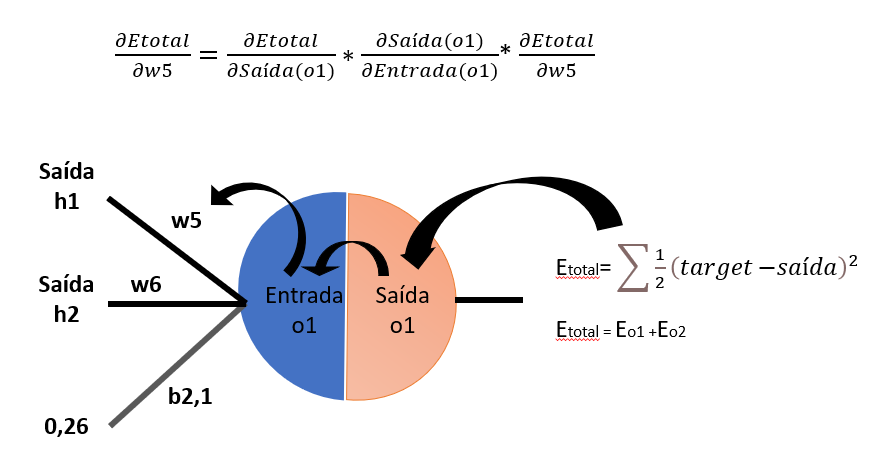









Para cálcular os novos pesos "w5" e "w6" temos que saber $\frac{{\partial E_{\text{total}}}}{{\partial w5}}$

\\

$\frac{{\partial E_{\text{total}}}}{{\partial w5}} = \frac{{\partial E_{\text{total}}}}{{\partial \text{saída}(o1)}} \cdot \frac{{\partial \text{saída}(o1)}}{{\partial \text{entrada}(o1)}} \cdot \frac{{\partial \text{entrada}(o1)}}{{\partial w5}}$

\\

Cálculos $\frac{{\partial E_{\text{total}}}}{{\partial \text{Saída}(o1)}}$

$E_{\text{total}} = \frac{1}{2} (\text{target}_1 - \text{Saida}(\text{o}_1))^2 + \frac{1}{2} (\text{target}_2 - \text{Saida}(\text{o}_2))^2
\hspace{0.2cm} (=) \\
\frac{{\partial E_{\text{total}}}}{{\partial \text{saída}(o1)}}  = 2 \cdot \frac{1}{2} \cdot \left(\text{target}_1 - \text{saída}(o1)\right)^2 \cdot (-1 + 0)$
(=)
$\frac{{\partial E_{\text{total}}}}{{\partial \text{Saída}(o1)}} = -(\text{target}_1 - \text{Saída}(o1))$

\\
Repetir os cálculos para os novos pesos "w7" e "w8"

$
\frac{{\partial E_{\text{total}}}}{{\partial w7}} = \frac{{\partial E_{\text{total}}}}{{\partial \text{Saída}(o2)}} \cdot \frac{{\partial \text{Saída}(o2)}}{{\partial \text{Entrada}(o2)}} \cdot \frac{{\partial \text{Entrada}(o2)}}{{\partial w7}}$

\\

Repetir os cálculos
$\frac{{\partial E_{\text{total}}}}{{\partial \text{Saída}(o2)}}
$



<!--


$
\text{Para cálcular os novos pesos "w5" e "w6" temos que saber}
\hspace{0.2cm}
\frac{{\partial E_{\text{total}}}}{{\partial w5}}\\
\frac{{\partial E_{\text{total}}}}{{\partial w5}} = \frac{{\partial E_{\text{total}}}}{{\partial \text{saída}(o1)}} \cdot \frac{{\partial \text{saída}(o1)}}{{\partial \text{entrada}(o1)}} \cdot \frac{{\partial \text{entrada}(o1)}}{{\partial w5}}
\hspace{0.2cm}\\
\hspace{0.2cm}\\
\hspace{0.2cm}\\
\hspace{0.2cm}\\
\text{Cálculos para o primeiro parametro}\hspace{0.2cm}
\frac{{\partial E_{\text{total}}}}{{\partial \text{Saída}(o1)}}\\
E_{\text{total}} = \frac{1}{2} (\text{target}_1 - \text{Saida}(\text{o}_1))^2 + \frac{1}{2} (\text{target}_2 - \text{Saida}(\text{o}_2))^2
\hspace{0.2cm} (=)\\
\frac{{\partial E_{\text{total}}}}{{\partial \text{saída}(o1)}}  = 2 \cdot \frac{1}{2} \cdot \left(\text{target}_1 - \text{saída}(o1)\right)^2 \cdot (-1 + 0)
\hspace{0.2cm} (=)\\
\frac{{\partial E_{\text{total}}}}{{\partial \text{Saída}(o1)}} = -(\text{target}_1 - \text{Saída}(o1))
\hspace{0.2cm}\\
\hspace{0.2cm}\\
\hspace{0.2cm}\\
\hspace{0.2cm}\\
\text{Repetir os cálculos para os novos pesos "w7" e "w8"}
\hspace{0.2cm}\\
\frac{{\partial E_{\text{total}}}}{{\partial w7}} = \frac{{\partial E_{\text{total}}}}{{\partial \text{Saída}(o2)}} \cdot \frac{{\partial \text{Saída}(o2)}}{{\partial \text{Entrada}(o2)}} \cdot \frac{{\partial \text{Entrada}(o2)}}{{\partial w7}}
\hspace{0.2cm}\\
\hspace{0.2cm}\\
\text{Repetir os cálculos}\hspace{0.2cm} \frac{{\partial E_{\text{total}}}}{{\partial \text{Saída}(o2)}}
$
-->

In [ ]:
Etotal_saida_o1= -(target_1 - saida_o1)
print("Etotal/saida(o1) =", Etotal_saida_o1)

Etotal_saida_o2= -(target_2 - saida_o2)
print("Etotal/saida(o2) =", Etotal_saida_o2)


Etotal/saida(o1) = 0.6765720365231982
Etotal/saida(o2) = -0.2451631690097763


$
\text{Cálculos para o segundo parametro}\hspace{0.2cm}
 \frac{{\partial \text{saída}(o1)}}{{\partial \text{entrada}(o1)}}\\
\text{saida}(o_1) = \frac{1}{{1 + e^{-\text{entrada(o1)}}}}\\
\frac{\partial \text{saída}(o_1)}{\partial \text{sntrada}(o_1)} = \text{saída}(o_1) \cdot (1 - \text{saída}(o_1))$

\\

Repetir os cálculos para o segundo parametro $\frac{{\partial \text{saída}(o2)}}{{\partial \text{entrada}(o2)}}$


In [ ]:
saida_o1_entrada_o1 = saida_o1*(1-saida_o1)
print("saida_o1/entrada_o1 =", saida_o1_entrada_o1)

saida_o2_entrada_o2 = saida_o2*(1-saida_o2)
print("saida_o2/entrada_o2 =", saida_o2_entrada_o2)

saida_o1/entrada_o1 = 0.2151908751875864
saida_o2/entrada_o2 = 0.19005492619066464


$
\text{Cálculos para o terceiro parametro}\hspace{0.2cm}
 \frac{{\partial \text{saída}(o1)}}{{\partial \text{w5}}}\\
 \text{entrada}(o_1) = w_5 \cdot \text{saída}(h_1) + w_6 \cdot \text{saída}(h_2) + b_{2,1} \cdot 1\\
 \frac{{\partial \text{entrada}(o_1)}}{{\partial w_5}} = 1 \cdot \text{saída}(h_1) \cdot w_5^{(1-1)} + 0 + 0\\
 \frac{{\partial \text{entrada}(o_1)}}{{\partial w_5}} = \text{saída}(h_1)$

\\

Repetir os cálculos para o terceiro parametro
$\frac{{\partial \text{entrada}(o_2)}}{{\partial w_7}}  \hspace{0.2cm}$
<!-- \frac{{\partial \text{entrada}(o_2)}}{{\partial w_7}} = 0.67195
 -->

In [ ]:
entrada_o1_w5 = saida_h1
print("entrada_o1/w5=", entrada_o1_w5 )

entrada_o2_w7 = saida_h2
print("entrada_o1/w5=", entrada_o2_w7 )

entrada_o1/w5= 0.6356886406718383
entrada_o1/w5= 0.6719460548503549



Depois de cácular todos os parametos substitui os valores $\frac{{\partial E_{total}}}{{\partial w5}}: $


$\frac{{\partial E_{total}}}{{\partial w5}} = \frac{{\partial E_{total}}}{{\partial saída(o1)}} \cdot \frac{{\partial saída(o1)}}{{\partial entrada(o1)}} \cdot \frac{{\partial entrada(o1)}}{{\partial w5}}$

\\

Repetir o mesmo processo para $\frac{{\partial E_{total}}}{{\partial w7}}$

In [ ]:
Etotal_w5 = Etotal_saida_o1 + saida_o1_entrada_o1 + entrada_o1_w5
print("Etotal/w5=", Etotal_w5 )

Etotal_w7 = Etotal_saida_o2 + saida_o2_entrada_o2 + entrada_o2_w7
print("Etotal/w7=", Etotal_w7 )

NameError: ignored

### *Calcular novos pesos com uma taxa de aprendizagem (learning_rate) 𝜂=0,5  *

\\

Calculos para novos pesos w5 e w6: \\
w5+ = w5 - 𝜂*$\frac{{\partial E_{\text{total}}}}{{\partial w7}}$ (=) \\

Repetir o processo: W6+

 \\
 \\

Calculos para novos pesos w7 e w8: \\
w7+ = w7 - 𝜂*$\frac{{\partial E_{\text{total}}}}{{\partial w7}}$ (=) \\


Repetir o processo: W8+



In [ ]:
# Atualizar pesos da camada de saída
w5 = w5 -learning_rate * Etotal_w5
w6 = w6 -learning_rate * Etotal_w5
w7 = w7 -learning_rate * Etotal_w7
w8 = w8 -learning_rate * Etotal_w7

print("W5+ =", w5)
print("W6+ =", w6)
print("W7+ =", w7)
print("W8+ =", w8)

W5+ = -0.39372577619131144
W6+ = -0.33372577619131144
W7+ = 0.17158109398437837
W8+ = 0.22158109398437842


---
$\hspace{0.2cm}*********REGRA\hspace{0.2cm}DA\hspace{0.2cm}CADEIA*********$
---
---

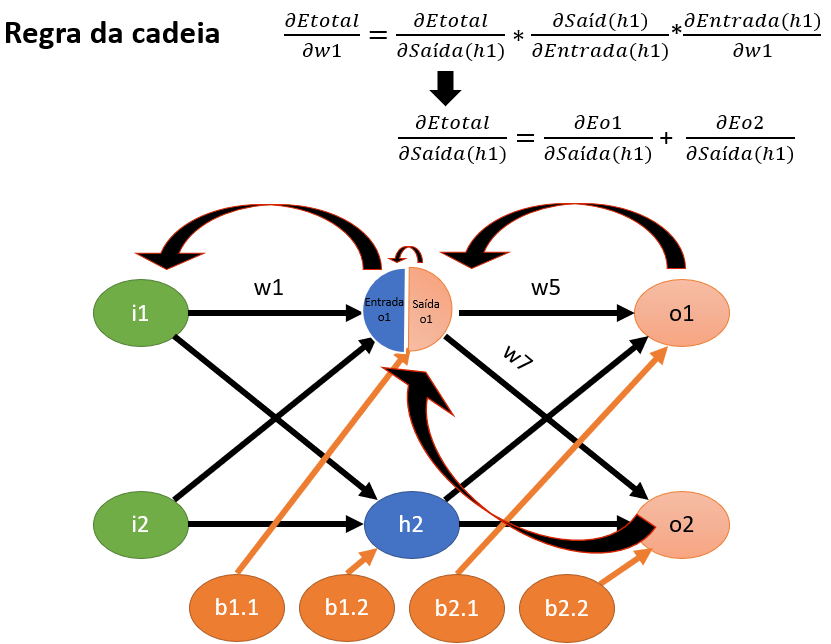


Cálculos para descobrir o valor de $\frac{{\partial E_{total}}}{{\partial Saida(h1)}}$:

$\frac{{\partial E_{total}}}{{\partial Saida(h1)}} = \frac{{\partial E_{o1}}}{{\partial Saída(h1)}} \cdot \frac{{\partial E_{o2}}}{{\partial Saída(h1)}} $

\\

Mas antes temos que saber o valor de $\frac{{\partial E_{o1}}}{{\partial Saída(h1)}}$:

$\frac{{\partial E_{o1}}}{{\partial Saída(h1)}} = \frac{{\partial E_{o1}}}{{\partial Entrada(h1)}} \cdot \frac{{\partial Entrada(o1)}}{{\partial Saída(h1)}}$

\\

E também temos de saber $\frac{{\partial Entrada(o1)}}{{\partial Saída(h1)}}$:

$\frac{{\partial Entrada(o1)}}{{\partial Saída(h1)}}$ = w5 $\cdot$ Saida(h1) + w7 $\cdot$ Saida(h2) + b2,1 $\cdot$ 1

\\

Repetindo o processo para $\frac{{\partial E_{o2}}}{{\partial Saida(h1)}}$


In [ ]:
#Calculos para Eo1/Entrada(h1)

Eo1_Entrada_h1 = Etotal_saida_o1 * saida_o1_entrada_o1
Eo1_Saida_h1 =Eo1_Entrada_h1 * w5   #Entrada(o1)/Saida(h1) = w5

print("Eo1/Entrada(h1) =", Eo1_Entrada_h1)


#Calculos para Eo2/Entrada(h1)

Eo2_Entrada_h2 = Etotal_saida_o2 * saida_o2_entrada_o2
Eo2_Saida_h1 = Eo2_Entrada_h2 * w7  #Entrada(o2)/Saida(h1) = w7

print("Eo2/Entrada(h2) =", Eo2_Entrada_h2)


Eo1/Entrada(h1) = 0.14559212866687468
Eo2/Entrada(h2) = -0.04659446799082247


Depois de calcular subestituimos

$\frac{{\partial E_{total}}}{{\partial Saida(h1)}} = \frac{{\partial E_{o1}}}{{\partial Saída(h1)}} \cdot \frac{{\partial E_{o2}}}{{\partial Saída(h1)}} $


In [ ]:
Etotal_Saida_h1 = Eo1_Saida_h1 + Eo2_Saida_h1
print("Etotal/Saida(h1) =", Etotal_Saida_h1)

Etotal/Saida(h1) = -0.06531810365819594


Agora vamos descobir $\frac{{\partial E_{total}}}{{\partial w1}}$:

Através da equação $\frac{{\partial E_{total}}}{{\partial w1}} = \frac{{\partial E_{total}}}{{\partial Saída(h1)}} \cdot \frac{{\partial Saída(h1)}}{{\partial Entrada(h1)}} \cdot \frac{{\partial Entrada(h1)}}{{\partial w1}} $

\\

Calculos para $\frac{{\partial Saída(h1)}}{{\partial Entrada(h1)}}$

$Saída(h1) = \frac{1}{1 + \exp{(-Entrada(h1))}} (=) \frac{{\partial Saída(h1)}}{{\partial Entrada(h1)}}$


\\

Repetir o mesmo para $\frac{{\partial Saída(h2)}}{{\partial Entrada(h2)}}$



In [ ]:
#Calculos Saida(h1)/Entrada(h1)
saida_h1_entrada_h1= (saida_h1 * (1 - saida_h1))
print("Saida(h1)/Entrada(h1)=", saida_h1_entrada_h1 )

#Calculos Saida(h2)/Entrada(h2)
saida_h2_entrada_h2= (saida_h2 * (1 - saida_h2))
print("Saida(h2)/Entrada(h2)=", saida_h2_entrada_h2 )

NameError: ignored

Calcular $\frac{{\partial Entrada(h1)}}{{\partial w1}}$:


Entrada(h1) = w1 $\cdot$ i1 + w2 $\cdot$ i2 + $b_{1,1} \cdot$ 1 (=) $\frac{{\partial Entrada(h1)}}{{\partial w1}}$ = i1

\\

Dspois de calcular todos os valores sustituímos:

 $\frac{{\partial E_{total}}}{{\partial w1}} = \frac{{\partial E_{total}}}{{\partial Saída(h1)}} \cdot \frac{{\partial Saída(h1)}}{{\partial Entrada(h1)}} \cdot \frac{{\partial Entrada(h1)}}{{\partial w1}} $

\\


Repetir o mesmo para $\frac{{\partial E_{total}}}{{\partial w2}}$

In [ ]:
Etotal_w1 = Etotal_Saida_h1  * saida_h1_entrada_h1  * i1
print("Etotal/w1=", Etotal_w1)

Etotal_w2 = Etotal_Saida_h1  * saida_h2_entrada_h2  * i2
print("Etotal/w2=", Etotal_w2)

NameError: ignored

### *Calcular novos bias com uma taxa de aprendizagem (learning_rate) 𝜂=0,5  *

\\
Calculos para novos pesos w1 e w3: \\
w1+ = w1 - 𝜂*$\frac{{\partial E_{\text{total}}}}{{\partial w1}}$ (=) \\
w3+ = w3 - 𝜂*$\frac{{\partial E_{\text{total}}}}{{\partial w1}}$ (=)


Calculos para novos pesos w2 e w4: \\
w2+ = w2 - 𝜂*$\frac{{\partial E_{\text{total}}}}{{\partial w2}}$ (=) \\
w4+ = w4 - 𝜂*$\frac{{\partial E_{\text{total}}}}{{\partial w2}}$ (=)


\\

Calculos para novos bias $b_{2,1}$ e $b_{2,2}$: \\
$b_{2,1}$+ = $b_{2,1}$ - 𝜂*$\frac{{\partial E_{\text{total}}}}{{\partial w1}}$

Repetir o processo: \\
$b_{2,2}$+ = $b_{2,1}$ - 𝜂*$\frac{{\partial E_{\text{total}}}}{{\partial w2}}$





In [ ]:
# Atualizar pesos
w1 = w1 -learning_rate * Etotal_w1
w2 = w2 -learning_rate * Etotal_w2
w3 = w3 -learning_rate * Etotal_w1
w4 = w4 -learning_rate * Etotal_w2

print("W1+ =", w1)
print("W2+ =", w2)
print("W3+ =", w3)
print("W4+ =", w4)


# Atualizar bias
b21 += -learning_rate * Etotal_w1 * 1
b22 += -learning_rate * Etotal_w2 * 1

print("b21 =", b21)
print("b22 =", b22)

W1+ = 0.11166396204810931
W2+ = 0.2566952406840539
W3+ = 0.27166396204810933
W4+ = 0.3266952406840539
b21 = 0.2616639620481093
b22 = 0.4166952406840539
